In [7]:
from utils import DQN, ReplayBuffer, greedy_action, epsilon_greedy, update_target, loss

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math
import numpy as np

import gym
import matplotlib.pyplot as plt

In [8]:
NUM_RUNS = 10
EPSILON = 0.2    # placeholder value - you should implement your own exploration schedule

In [ ]:
runs_results = []

env = gym.make('CartPole-v1')
for run in range(NUM_RUNS):
    print(f"Starting run {run+1} of {NUM_RUNS}")
    policy_net = DQN([4,256,2])
    target_net = DQN([4,256,2])
    update_target(target_net, policy_net)
    target_net.eval()

    optimizer = optim.Adam(policy_net.parameters(), lr=0.005)
    memory = ReplayBuffer(10000)

    steps_done = 0

    episode_durations = []

    for i_episode in range(300):
        if (i_episode+1) % 50 == 0:
            print("episode ", i_episode+1, "/", 300)

        observation, info = env.reset()
        state = torch.tensor(observation).float()

        done = False
        terminated = False
        t = 0
        while not (done or terminated):

            # Select and perform an action
            action = epsilon_greedy(EPSILON, policy_net, state)

            observation, reward, done, terminated, info = env.step(action)
            reward = torch.tensor([reward])
            action = torch.tensor([action])
            next_state = torch.tensor(observation).reshape(-1).float()

            memory.push([state, action, next_state, reward, torch.tensor([done])])

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            if not len(memory.buffer) < 256:
                transitions = memory.sample(256)
                state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                # Compute loss
                mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                # Optimize the model
                optimizer.zero_grad()
                mse_loss.backward()
                optimizer.step()
            
            if done or terminated:
                episode_durations.append(t + 1)
            t += 1
        # Update the target network, copying all weights and biases in DQN
        if i_episode % 1 == 0: 
            update_target(target_net, policy_net)
    runs_results.append(episode_durations)
print('Complete')

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

300


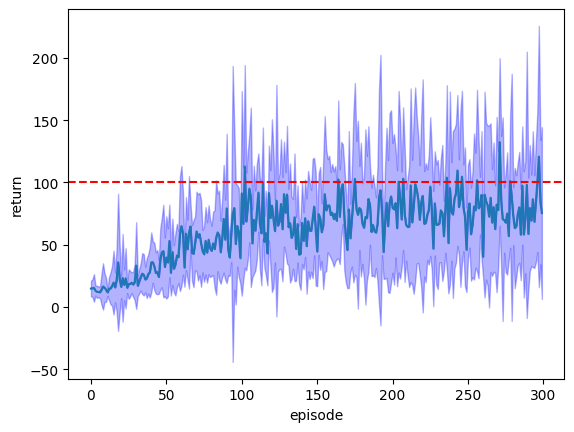

In [6]:
# Plotting the learning curve
# Placeholder plot, you are free to modify it
 
results = torch.tensor(runs_results)
print(len(runs_results[0]))
means = results.float().mean(0)
stds = results.float().std(0)

plt.plot(torch.arange(300), means)
plt.axhline(y=100, color='red', linestyle='--', label="Target Duration (100)")
plt.ylabel("return")
plt.xlabel("episode")
plt.fill_between(np.arange(300), means, means+stds, alpha=0.3, color='b')
plt.fill_between(np.arange(300), means, means-stds, alpha=0.3, color='b')
plt.show()


In [15]:
runs_results = []

env = gym.make('CartPole-v1')

print(f"Starting run {run+1} of {1}")
policy_net = DQN([4,256,2])
target_net = DQN([4,256,2])
update_target(target_net, policy_net)
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(), lr=0.005)
memory = ReplayBuffer(10000)

steps_done = 0

episode_durations = []

for i_episode in range(300):
    if (i_episode+1) % 50 == 0:
        print("episode ", i_episode+1, "/", 300)

    observation, info = env.reset()
    state = torch.tensor(observation).float()

    done = False
    terminated = False
    t = 0
    while not (done or terminated):

        # Select and perform an action
        action = epsilon_greedy(EPSILON, policy_net, state)

        observation, reward, done, terminated, info = env.step(action)
        reward = torch.tensor([reward])
        action = torch.tensor([action])
        next_state = torch.tensor(observation).reshape(-1).float()

        memory.push([state, action, next_state, reward, torch.tensor([done])])

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        if not len(memory.buffer) < 64:
            transitions = memory.sample(64)
            state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
            # Compute loss
            mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
            # Optimize the model
            optimizer.zero_grad()
            mse_loss.backward()
            optimizer.step()

        if done or terminated:
            episode_durations.append(t + 1)
        t += 1
    # Update the target network, copying all weights and biases in DQN
    if i_episode % 1 == 0: 
        update_target(target_net, policy_net)
runs_results.append(episode_durations)
print('Complete')

Starting run 10 of 1
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Complete


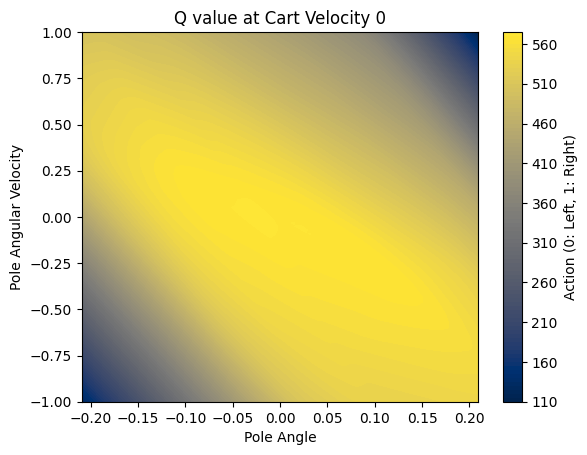

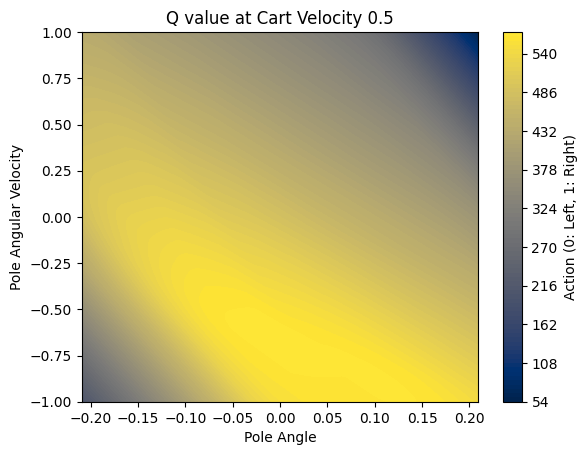

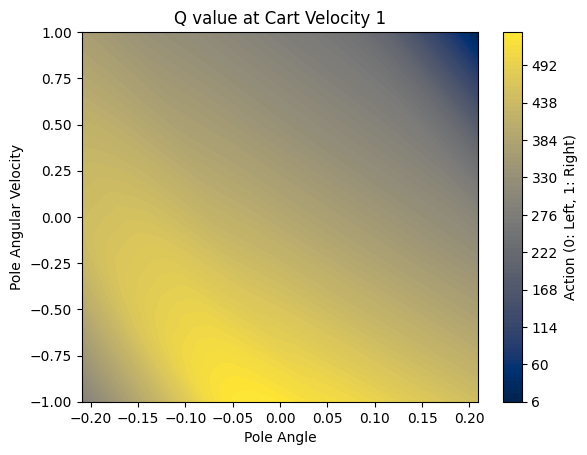

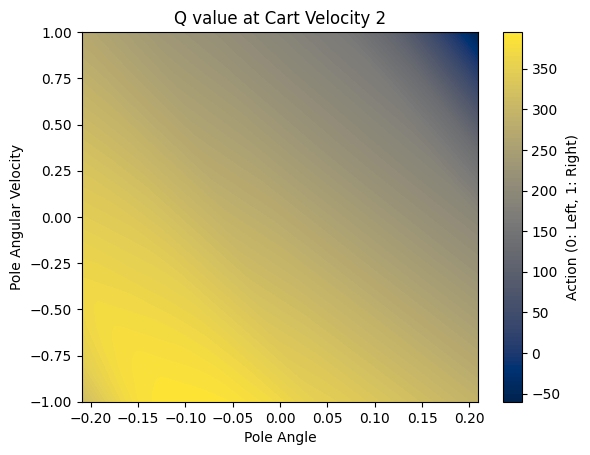

In [188]:


# Function to plot the greedy policy
def plot_greedy_policy(policy_net, cart_velocity, angle_range, omega_range, angle_samples, omega_samples,q):
    angles = torch.linspace(-angle_range, angle_range, angle_samples)
    omegas = torch.linspace(-omega_range, omega_range, omega_samples)
    
    greedy_q_array = torch.zeros((angle_samples, omega_samples))
    policy_array = torch.zeros((angle_samples, omega_samples))
    for i, angle in enumerate(angles):
        for j, omega in enumerate(omegas):
            state = torch.tensor([0., cart_velocity, angle, omega])
            with torch.no_grad():
                q_vals = policy_net(state)
                greedy_action = q_vals.argmax()
                greedy_q_array[i, j] = q_vals[greedy_action]
                policy_array[i, j] = greedy_action

    # Plotting
    if q:
        plt.contourf(angles, omegas, greedy_q_array.T, cmap='cividis', levels=100)
        plt.title(f"Q value at Cart Velocity {cart_velocity}")
        plt.xlabel("Pole Angle")
        plt.ylabel("Pole Angular Velocity")
        plt.colorbar(label='Action (0: Left, 1: Right)')
        plt.show()
    else:
        plt.contourf(angles, omegas, policy_array.T, cmap='cividis')
        plt.title(f"Greedy Policy at Cart Velocity {cart_velocity}")
        plt.xlabel("Pole Angle")
        plt.ylabel("Pole Angular Velocity")
        plt.colorbar(label='Action (0: Left, 1: Right)')
        plt.show()



# Parameters for the plot
angle_range = .2095
omega_range = 1
angle_samples = 100
omega_samples = 100

# Plotting for different cart velocities
for cart_velocity in [0, 0.5, 1, 2]:
    plot_greedy_policy(policy_net, cart_velocity, angle_range, omega_range, angle_samples, omega_samples,True)


angles tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798

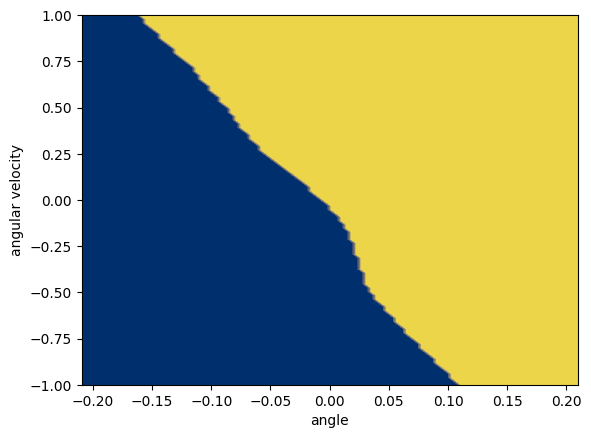

In [184]:
# Visualising the greedy Q-values for a stationary cart in the middle of the track
# 2D plot showing policy as a function of pole angle and angular velocity (omega)

# This plots the policy and Q values according to the network currently
# stored in the variable "policy_net"

# All visualisations provided here are placeholders and you can modify these plots

# Make sure to include appropriate labels and/or legends when presenting your plot

#policy_net = DQN([4,2])   # randomly initialised, replace with your trained DQN
q = False   # whether q values or greedy policy is visualised

angle_range = .2095 # you may modify this range
omega_range = 1     # you may modify this range

angle_samples = 100
omega_samples = 100
angles = torch.linspace(angle_range, -angle_range, angle_samples)
omegas = torch.linspace(-omega_range, omega_range, omega_samples)
print("angles",omegas)

greedy_q_array = torch.zeros((angle_samples, omega_samples))
policy_array = torch.zeros((angle_samples, omega_samples))
for i, angle in enumerate(angles):
    for j, omega in enumerate(omegas):
        state = torch.tensor([0., 0., angle, omega])
        with torch.no_grad():
            q_vals = policy_net(state)
            greedy_action = q_vals.argmax()
            greedy_q_array[i, j] = q_vals[greedy_action]
            policy_array[i, j] = greedy_action
if q:
    print("1")
    plt.contourf(angles, omegas, greedy_q_array.T, cmap='cividis', levels=100)
else:
    print("2")
    plt.contourf(angles, omegas, policy_array.T, cmap='cividis')
plt.xlabel("angle")
plt.ylabel("angular velocity")
plt.show()